In [1]:
import pandas as pd
import numpy as np
# Load the CSV file
df = pd.read_csv("Diapers.csv")

# Display the first few rows
print(df.head())


                                                name         main_category  \
0  Himalaya Total Care Baby Pants Diapers, Small,...  toys & baby products   
1  Little's Baby Pants Diapers,Small (S),4-8 kg,4...  toys & baby products   
2  Little's Comfy Baby Pants - Premium, 12 Hours ...  toys & baby products   
3  Little's Soft Cleansing Baby Wipes with Aloe V...  toys & baby products   
4  Johnson's Baby Skincare Wipes with Lid, 72s Tw...  toys & baby products   

  sub_category                                              image  \
0      Diapers  https://m.media-amazon.com/images/I/810VDt-vR+...   
1      Diapers  https://m.media-amazon.com/images/I/715e4ZYF7j...   
2      Diapers  https://m.media-amazon.com/images/I/81Z+SsmZNu...   
3      Diapers  https://m.media-amazon.com/images/I/71XAO+WcGt...   
4      Diapers  https://m.media-amazon.com/images/I/61vUG2KPY1...   

                                                link ratings no_of_ratings  \
0  https://www.amazon.in/Himalaya-Tota

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
name                0
main_category       0
sub_category        0
image               0
link                0
ratings           155
no_of_ratings     155
discount_price     66
actual_price       13
dtype: int64


In [3]:
# Option 1: Drop rows with any missing values
# df.dropna(inplace=True)

# Option 2: Fill missing values
# Fill numerical columns with the mean
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Fill categorical columns with the mode
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)


C:\Users\RAMEEN SHAHID\AppData\Local\Temp\ipykernel_336\323745504.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [4]:
# Remove duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [5]:
# Check data types
print("Data types before conversion:")
print(df.dtypes)

# Example: Convert a column to numeric if necessary
# df['column_name'] = pd.to_numeric(df['column_name'], errors='coerce')

# Convert categorical columns to 'category' dtype
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype('category')

print("Data types after conversion:")
print(df.dtypes)


Data types before conversion:
name              object
main_category     object
sub_category      object
image             object
link              object
ratings           object
no_of_ratings     object
discount_price    object
actual_price      object
dtype: object
Data types after conversion:
name              category
main_category     category
sub_category      category
image             category
link              category
ratings           category
no_of_ratings     category
discount_price    category
actual_price      category
dtype: object


In [6]:
# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)


## New Features to Add
##### Ratings: Convert to numeric (average rating).

##### Number of Ratings: Convert to numeric (total number of ratings).

##### Discount Price: Convert to numeric (discounted price).

##### Actual Price: Convert to numeric (original price).

##### Discount Percentage: Calculate the discount percentage based on actual and discount prices.

##### Price Difference: Calculate the difference between actual and discount prices.

##### Category Encoding: Convert categorical variables into numerical representations.

In [7]:
# Step 1: Convert ratings and price columns to numeric types
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'].str.replace(',', '').str.strip(), errors='coerce')
df['discount_price'] = pd.to_numeric(df['discount_price'].str.replace('₹', '').str.replace(',', '').str.strip(), errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'].str.replace('₹', '').str.replace(',', '').str.strip(), errors='coerce')

# Step 2: Create new features
# Calculate Discount Percentage
df['discount_percentage'] = ((df['actual_price'] - df['discount_price']) / df['actual_price']) * 100

# Calculate Price Difference
df['price_difference'] = df['actual_price'] - df['discount_price']

# Step 3: Encode categorical variables if necessary
df['main_category'] = df['main_category'].astype('category').cat.codes
df['sub_category'] = df['sub_category'].astype('category').cat.codes

# Step 4: Display the updated DataFrame with new features
print(df.head())
print(df.info())

                                                name  main_category  \
0  Himalaya Total Care Baby Pants Diapers, Small,...              0   
1  Little's Baby Pants Diapers,Small (S),4-8 kg,4...              0   
2  Little's Comfy Baby Pants - Premium, 12 Hours ...              0   
3  Little's Soft Cleansing Baby Wipes with Aloe V...              0   
4  Johnson's Baby Skincare Wipes with Lid, 72s Tw...              0   

   sub_category                                              image  \
0             0  https://m.media-amazon.com/images/I/810VDt-vR+...   
1             0  https://m.media-amazon.com/images/I/715e4ZYF7j...   
2             0  https://m.media-amazon.com/images/I/81Z+SsmZNu...   
3             0  https://m.media-amazon.com/images/I/71XAO+WcGt...   
4             0  https://m.media-amazon.com/images/I/61vUG2KPY1...   

                                                link  ratings  no_of_ratings  \
0  https://www.amazon.in/Himalaya-Total-Pants-Dia...      3.9          7

## Statistical feature engineering

In [9]:
# 1. Summary Statistics
df['mean_rating'] = df['ratings'].mean()
df['median_rating'] = df['ratings'].median()
df['std_rating'] = df['ratings'].std()
df['variance_rating'] = df['ratings'].var()

In [10]:
# 2. Aggregate Features
average_rating_by_category = df.groupby('main_category')['ratings'].mean().reset_index()
average_rating_by_category.columns = ['main_category', 'average_category_rating']
df = pd.merge(df, average_rating_by_category, on='main_category', how='left')

In [12]:
# 3. Interaction Features
df['rating_price_interaction'] = df['ratings'] * df['actual_price']

# 4. Binning
df['price_category'] = pd.cut(df['actual_price'], bins=[0, 500, 1000, 2000, 5000, float('inf')], labels=['0-500', '500-1000', '1000-2000', '2000-5000', '5000+'])

# 5. Ratios
df['discount_ratio'] = df['discount_price'] / df['actual_price']


## business analysis features

In [13]:
# 1. Profit Margin
df['profit_margin'] = (df['actual_price'] - df['discount_price']) / df['actual_price'] * 100

# 2. Sales Potential
df['sales_potential'] = df['ratings'] * df['no_of_ratings']

# 3. Price Sensitivity
df['price_sensitivity'] = ((df['actual_price'] - df['discount_price']) / df['actual_price']) * 100

# 4. Popularity Index
df['popularity_index'] = df['ratings'] * df['no_of_ratings']

In [14]:
# 5. Category Penetration Rate
category_count = df.groupby('main_category')['no_of_ratings'].sum().reset_index()
category_count.columns = ['main_category', 'category_total_ratings']
df = pd.merge(df, category_count, on='main_category', how='left')
df['category_penetration_rate'] = df['no_of_ratings'] / df['category_total_ratings']

# 6. Discount Amount
df['discount_amount'] = df['actual_price'] - df['discount_price']


In [15]:
# Display the updated DataFrame with new business analysis features
print(df.head())
print(df.info())

                                                name  main_category  \
0  Himalaya Total Care Baby Pants Diapers, Small,...              0   
1  Little's Baby Pants Diapers,Small (S),4-8 kg,4...              0   
2  Little's Comfy Baby Pants - Premium, 12 Hours ...              0   
3  Little's Soft Cleansing Baby Wipes with Aloe V...              0   
4  Johnson's Baby Skincare Wipes with Lid, 72s Tw...              0   

   sub_category                                              image  \
0             0  https://m.media-amazon.com/images/I/810VDt-vR+...   
1             0  https://m.media-amazon.com/images/I/715e4ZYF7j...   
2             0  https://m.media-amazon.com/images/I/81Z+SsmZNu...   
3             0  https://m.media-amazon.com/images/I/71XAO+WcGt...   
4             0  https://m.media-amazon.com/images/I/61vUG2KPY1...   

                                                link  ratings  no_of_ratings  \
0  https://www.amazon.in/Himalaya-Total-Pants-Dia...      3.9          7

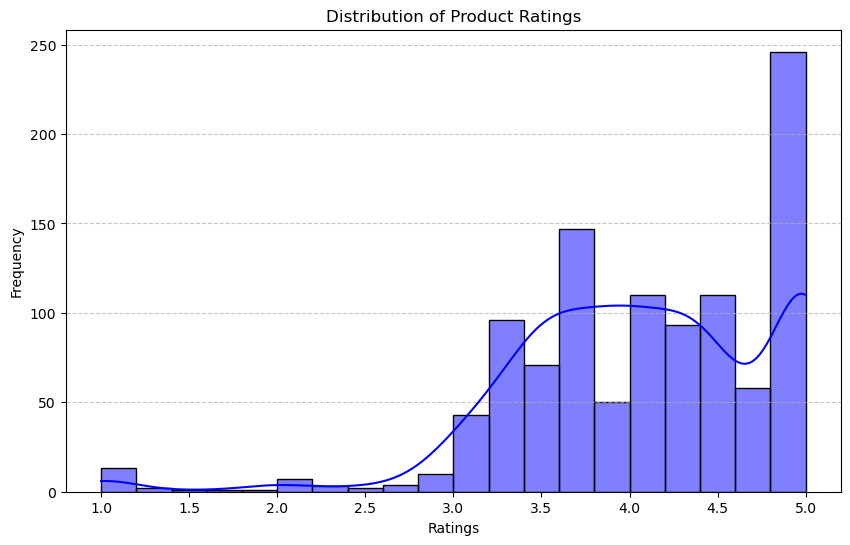

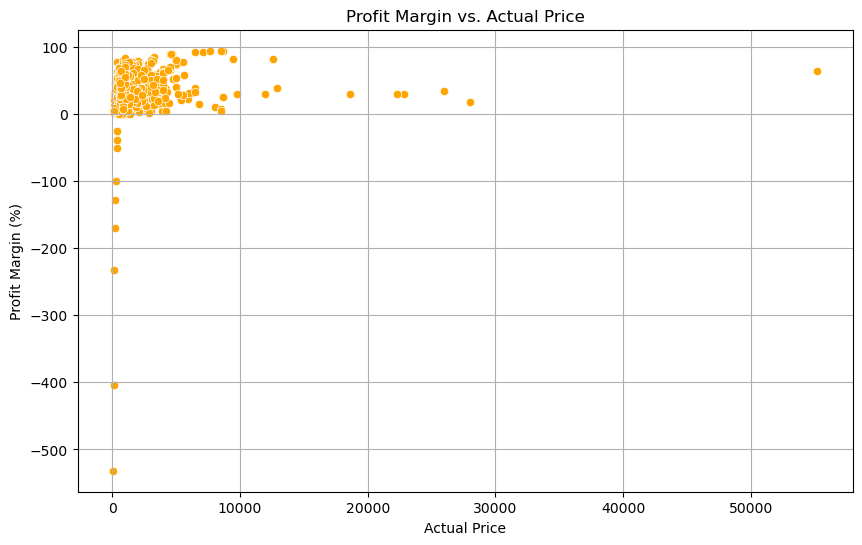

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['ratings'], bins=20, kde=True, color='blue')
plt.title('Distribution of Product Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualization 2: Profit Margin vs. Actual Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_price', y='profit_margin', data=df, color='orange')
plt.title('Profit Margin vs. Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Profit Margin (%)')
plt.grid()
plt.show()

C:\Users\RAMEEN SHAHID\AppData\Local\Temp\ipykernel_336\3014529514.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='main_category', y='discount_percentage', data=average_discount, palette='viridis')


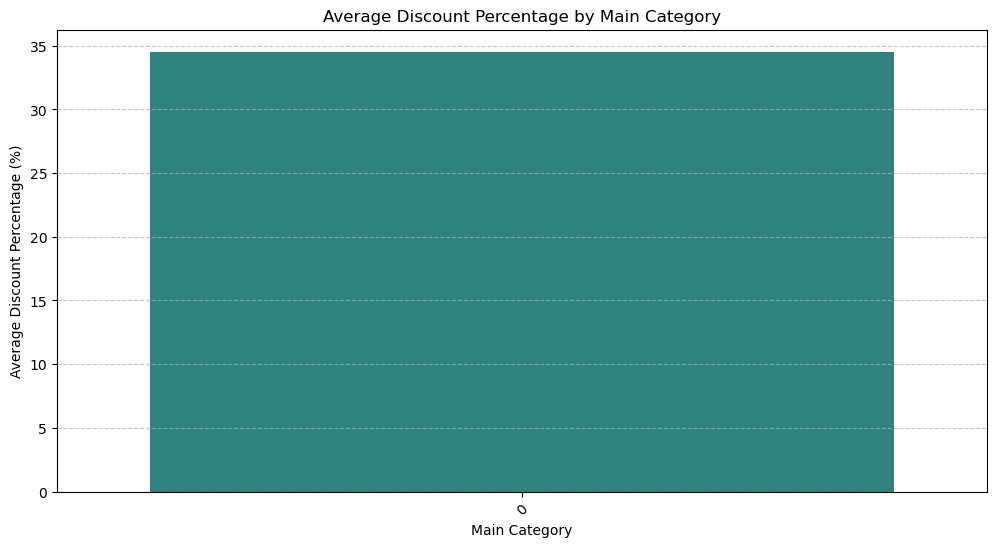

In [20]:
# Visualization 3: Average Discount Percentage by Category
average_discount = df.groupby('main_category')['discount_percentage'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='main_category', y='discount_percentage', data=average_discount, palette='viridis')
plt.title('Average Discount Percentage by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Average Discount Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [21]:
# Save cleaned dataset
df.to_csv('Diapers_cleaned.csv', index=False)

print("Cleaned dataset saved as 'Diapers_cleaned.csv'")

Cleaned dataset saved as 'Diapers_cleaned.csv'
